# Apple Stock Price Prediction using RNN-LSTM

## Introduction:

In this project I am going to predict Apple stock price using Long Short-Term Memory(LSTM) network 
of Recurrent Neural Network (RNN).

RNN works with sequential data i.e when the data at a certain time depends on the data in previous time steps.
For example: data of daily stock price, words in order in a sentence, historical unemployment figure etc.

In RNN, the outputs from the hidden layers loops back and goes into hidden layer again. The reason, RNN needs to have the output of the hidden layer loops back because the prediction or ultimate output from the network is based on the current and historic data.

In a LSTM, it has the ability to remember longer sequences of data than an ordinary RNN. It categorizes data into short-term and long-term memory. By doing this, it remembers the important data, loops back those in the network for prediction and forgets the other. This enables LSTM to use long sequence of data to make prediction. 

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data 

For this project, I downloaded the stock price data from Nasdaq website, saved it in csv format 'apple_stock_data.csv' and imported in the following cell.   

In [2]:
all_apple_stock_data = pd.read_csv('apple_stock_data.csv')

In [3]:
all_apple_stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/27/2023,$193.22,47460180,$196.02,$197.20,$192.55
1,07/26/2023,$194.50,47471870,$193.67,$195.64,$193.32
2,07/25/2023,$193.62,37283200,$193.33,$194.44,$192.915
3,07/24/2023,$192.75,45505100,$193.41,$194.91,$192.25
4,07/21/2023,$191.94,71951680,$194.10,$194.97,$191.23


In [4]:
all_apple_stock_data.shape

(124, 6)

## Data Wrangling

Here, I am going to use only the 'Open' column, but it contians the $ sign before each value, hence I removed it.

In [5]:
all_apple_stock_data['Open'] = all_apple_stock_data['Open'].apply(lambda x:x[1:]).astype('float')

In [6]:
all_apple_stock_data.dtypes

Date           object
Close/Last     object
Volume          int64
Open          float64
High           object
Low            object
dtype: object

In [7]:
all_apple_stock_data['Open'].describe()

count    124.000000
mean     168.795048
std       15.340196
min      142.700000
25%      153.782500
50%      166.347500
75%      182.672500
max      196.020000
Name: Open, dtype: float64

In [8]:
apple_open_prices = all_apple_stock_data[['Open']].values

## Data Preprocessing: Scaling data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [11]:
apple_prices_scaled = scaler.fit_transform(apple_open_prices)

In [12]:
apple_prices_scaled

array([[1.        ],
       [0.95592648],
       [0.94954989],
       [0.95105026],
       [0.963991  ],
       [0.98255814],
       [0.94523631],
       [0.94992498],
       [0.92273068],
       [0.89141035],
       [0.89647412],
       [0.88109527],
       [0.87134284],
       [0.8732183 ],
       [0.91354089],
       [0.88409602],
       [0.91644786],
       [0.9579895 ],
       [0.91766692],
       [0.86984246],
       [0.84827457],
       [0.810015  ],
       [0.82764441],
       [0.80363841],
       [0.76969242],
       [0.79144786],
       [0.78225806],
       [0.82576894],
       [0.77381845],
       [0.76275319],
       [0.75206302],
       [0.72336834],
       [0.72768192],
       [0.66007127],
       [0.67029257],
       [0.69889347],
       [0.74887472],
       [0.71886722],
       [0.6564141 ],
       [0.6493811 ],
       [0.64253563],
       [0.57426857],
       [0.5572018 ],
       [0.53244561],
       [0.57070518],
       [0.58664666],
       [0.63184546],
       [0.568

In [13]:
num_of_prices = len(apple_prices_scaled)

In [14]:
num_of_prices

124

## Forming Feature-label dataset, splitting into train & test datasets 

In [15]:
# Get the train and test sets from apple_prices_scaled
apple_price_features = []
apple_price_labels = []
for i in range(10, (num_of_prices)):
    apple_price_features.append(apple_prices_scaled[i-10:i, 0])
    apple_price_labels.append(apple_prices_scaled[i, 0])

Note: Here I am taking 10 past observations to predict the 11th observation. So past 10 observations are in apple_price_features and 11th is in apple_price_labels. 

In [16]:
apple_price_features[0]

array([1.        , 0.95592648, 0.94954989, 0.95105026, 0.963991  ,
       0.98255814, 0.94523631, 0.94992498, 0.92273068, 0.89141035])

In [17]:
x_train = np.array(apple_price_features[:100])
y_train = np.array(apple_price_labels[:100])

In [18]:
print(x_train.shape)
print(y_train.shape)

(100, 10)
(100,)


Here, I need to convert the x_train dataset from 2D to 3D in order to input it into my DL model, because that is how LSTM neural network in keras are structured. 

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape

(100, 10, 1)

In [21]:
# x_train

Note: Now this shows that x_train data has 100 groups of 10 coulmns. Each group has 10 rows and 1 columns. 

In [22]:
print(x_train[(0): (2)])

[[[1.        ]
  [0.95592648]
  [0.94954989]
  [0.95105026]
  [0.963991  ]
  [0.98255814]
  [0.94523631]
  [0.94992498]
  [0.92273068]
  [0.89141035]]

 [[0.95592648]
  [0.94954989]
  [0.95105026]
  [0.963991  ]
  [0.98255814]
  [0.94523631]
  [0.94992498]
  [0.92273068]
  [0.89141035]
  [0.89647412]]]


In [23]:
x_test = np.array(apple_price_features[101:])
y_test = np.array(apple_price_labels[101:])

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
x_test.shape

(13, 10, 1)

## Building RNN-LSTM model

In [26]:
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Model

input_layer = Input(shape = (x_train.shape[1], 1))                           # No need to specify how many groups there, only need how many rows in each group.
lstm1 = LSTM(100, activation = 'relu', return_sequences = True)(input_layer) # Return_sequence = True => The output coming from the layer will match the dimensions
                                                                             # of the input entered into the layer.
                                                                             # 100 represents 100 neurons, inside each eurons there are Blocks, each block contains
                                                                             # an input, output, update and forget gate. 


drop1 = Dropout(0.1)(lstm1)                                            # Dropout implies fraction of input units to drop. This helps to prevent overfitting (to training data)
lstm2 = LSTM(120, activation = 'relu', return_sequences = True)(drop1) # Here 120 implies this layer contains 120 neurons.
lstm3 = LSTM(80, activation = 'relu', return_sequences = True)(lstm2)
lstm4 = LSTM(50, activation ='relu')(lstm3)                            # Here no return_sequences mentioned because it is by default 'False', because the outputdimension from this not same as the input layer as the output and it has only one number.


output_layer = Dense(1)(lstm4)                                         # Here Dense(1) => 1 neuron in this layer, because it got one number only from previouslayer lstm4. 


model = Model(input_layer, output_layer)
model.compile(optimizer = 'adam', loss = 'mse')                       # 'adam' optimizer is good for small amount of input data like here. 

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 120)           106080    
                                                                 
 lstm_2 (LSTM)               (None, 10, 80)            64320     
                                                                 
 lstm_3 (LSTM)               (None, 50)                26200     
                                                                 
 dense (Dense)               (None, 1)                 51    

In [28]:
model_history = model.fit(x_train, y_train, batch_size = 20, epochs = 100, validation_data = (x_test, y_test), verbose = 1,)

Epoch 1/100
5/5 [==============================] - 7s 285ms/step - loss: 0.2849 - val_loss: 0.0121
Epoch 2/100
5/5 [==============================] - 0s 45ms/step - loss: 0.2111 - val_loss: 0.0049
Epoch 3/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0759 - val_loss: 0.0854
Epoch 4/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0417 - val_loss: 0.0405
Epoch 5/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0275 - val_loss: 0.0252
Epoch 6/100
5/5 [==============================] - 0s 48ms/step - loss: 0.0271 - val_loss: 0.0399
Epoch 7/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0181 - val_loss: 0.0516
Epoch 8/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0152 - val_loss: 0.0261
Epoch 9/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0127 - val_loss: 0.0214
Epoch 10/100
5/5 [==============================] - 0s 47ms/step - loss: 0.0078 - val_loss: 0.0177
Epoch 11/100
5/5 [

Epoch 84/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 85/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0021 - val_loss: 0.0051
Epoch 86/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 87/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 88/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0022 - val_loss: 0.0055
Epoch 89/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 90/100
5/5 [==============================] - 0s 45ms/step - loss: 0.0020 - val_loss: 0.0056
Epoch 91/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 92/100
5/5 [==============================] - 0s 42ms/step - loss: 0.0023 - val_loss: 0.0058
Epoch 93/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 94/1

## Prediction

In [29]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 978ms/step


In [30]:
print(y_pred.shape)

(13, 1)


In [31]:
y_pred = scaler.inverse_transform(y_pred)

In [32]:
print(y_pred)

[[148.40855]
 [148.26813]
 [148.09201]
 [147.88977]
 [147.70563]
 [147.7703 ]
 [147.65068]
 [148.04836]
 [148.6714 ]
 [148.83392]
 [148.53528]
 [148.18304]
 [148.09306]]


In [33]:
print(y_test.shape)

(13,)


Note: The y_test is in the form of a 1D array, but it needs to convert it into 2D array
So, we need to reshape it to use in the scaler.inverse_transform function

In [34]:
y_test = y_test.reshape(-1, 1)                                # -1 here says the first agument from the y_test.shape will remain the same i.e to say we've 13 rows. The last number (i.e 1) says, it'll add one column to it. 

In [35]:
y_test = scaler.inverse_transform(y_test)

In [36]:
print(y_test)

[[153.11 ]
 [152.12 ]
 [150.952]
 [149.46 ]
 [153.775]
 [153.88 ]
 [150.64 ]
 [152.575]
 [148.03 ]
 [148.9  ]
 [143.97 ]
 [142.7  ]
 [144.955]]


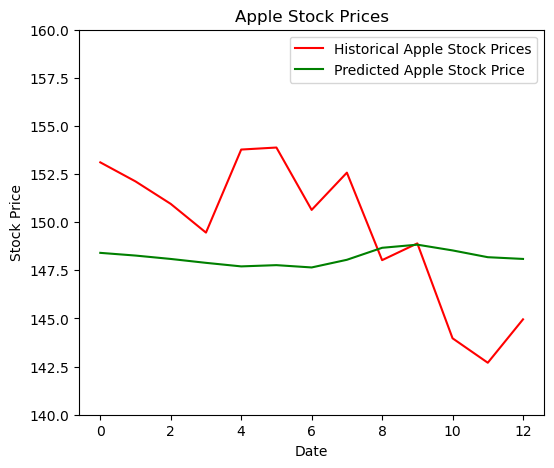

In [37]:
plt.figure(figsize = (6,5))
plt.plot(y_test, color = 'red', label = 'Historical Apple Stock Prices')
plt.plot(y_pred, color = 'green', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Prices')
plt.ylim(140, 160)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Prediction on new test data

In [38]:
# Predict the stock price from an array of ten new stock prices
new_array = np.array([142, 141, 140, 143, 144, 146, 148, 149, 149, 148])

Here, I need to convert the above array into a 2D array in order to use scaler.fit_transform function.

In [39]:
new_array = new_array.reshape(-1,1)

In [40]:
print(new_array)

[[142]
 [141]
 [140]
 [143]
 [144]
 [146]
 [148]
 [149]
 [149]
 [148]]


In [41]:
print(new_array.shape)

(10, 1)


In [42]:
new_array_scaled = scaler.fit_transform(new_array)

In [43]:
new_array_scaled = np.reshape(new_array_scaled, (1,10, 1))

In [44]:
print(new_array_scaled.shape)

(1, 10, 1)


In [45]:
print(new_array_scaled)

[[[0.22222222]
  [0.11111111]
  [0.        ]
  [0.33333333]
  [0.44444444]
  [0.66666667]
  [0.88888889]
  [1.        ]
  [1.        ]
  [0.88888889]]]


In [46]:
# Get the predicted stock price in scaled format
new_pred = model.predict(new_array_scaled)

1/1 [==============================] - 0s 52ms/step


In [47]:
# Inverse transform to get the real stock price
new_pred = scaler.inverse_transform(new_pred)

In [48]:
print(new_pred)

[[141.4404]]


In [49]:
print("The predicted stock price:", *new_pred[0]) # Remove the brackets

The predicted stock price: 141.4404


## Summary

In this project, I used Tensorflow library along with Keras to predict Apple stock price. The data was imported from Nasdaq website, separated into feature and label data, scaled by MinMaxScaler. I took 10 historic data to predict 11th day stock price. RNN-LSTM model was chosen for this prediction, different layers of the model were built, compiled. The model was tested on the test data. Finally a prediction was also mode on unseen data.      